In [13]:
%autosave 0

Autosave disabled


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
path = '../../data/prepared/'
train = pd.read_csv(path + 'train_data.csv')
train_labels = pd.read_csv(path + 'train_labels.csv')

In [3]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [4]:
train_labels.head()

,customer_ID,target
0,e039c846adcb1bfd543d89b8beba6a0f1a2ecdf835cd22...,0
1,8a96ff0aacb31ab4aab4cd15f13e024c04f986b8926789...,0
2,cfe6ef5945ef9c04937bb1826ec350ae7f2d173867f7fe...,0
3,9b677e823a94355cf65d2b97930dd59fce82cbf69e82b8...,1
4,d48853a03d0d463a4b058d129453daaf530160ccc4f0c2...,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470744 entries, 0 to 470743
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 682.4+ MB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,466807.0,0.654822,0.244151,-3.915485e-01,0.480436,0.691194,0.862548,1.010000
D_39,470744.0,0.152576,0.270041,3.785832e-08,0.004521,0.009034,0.235852,5.356063
B_1,470744.0,0.125361,0.212780,-1.808689e+00,0.008810,0.031263,0.128594,1.324060
B_2,470556.0,0.619467,0.401543,5.485064e-08,0.103320,0.814219,1.002312,1.010000
R_1,470744.0,0.078924,0.226229,5.138723e-09,0.002898,0.005788,0.008669,2.759651
...,...,...,...,...,...,...,...,...
D_141,462354.0,0.165757,0.349234,1.073346e-08,0.003039,0.006065,0.009103,1.245575
D_142,81073.0,0.391282,0.235656,-1.394664e-02,0.201264,0.382718,0.554260,1.816997
D_143,462354.0,0.180216,0.380161,1.653580e-08,0.003035,0.006053,0.009093,1.010000
D_144,467368.0,0.053471,0.185633,1.302884e-07,0.002760,0.005524,0.008281,1.343330


In [7]:
train['S_2']

0         2017-03-09
1         2017-04-07
2         2017-05-28
3         2017-06-13
4         2017-07-16
             ...    
470739    2017-11-06
470740    2017-12-03
470741    2018-01-16
470742    2018-02-23
470743    2018-03-31
Name: S_2, Length: 470744, dtype: object

In [8]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120',
                       'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [9]:
day0 = dt.datetime.strptime(train['S_2'][0], '%Y-%m-%d')

day1 = dt.datetime.strptime(train['S_2'][1], '%Y-%m-%d')

day0, day1

(datetime.datetime(2017, 3, 9, 0, 0), datetime.datetime(2017, 4, 7, 0, 0))

In [10]:
day1 - day0

datetime.timedelta(days=29)

In [11]:
(day1 - day0).days

29

In [12]:
train.groupby('customer_ID').head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470731,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-03-20,0.859869,0.097730,0.006084,1.000690,0.009374,0.106511,0.008502,0.007879,...,NaN,NaN,NaN,0.009985,0.005864,0.000090,NaN,0.001687,0.009154,0.004053
470732,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-04-25,0.871607,0.273379,0.039067,1.001983,0.005164,0.111218,0.002494,0.004682,...,NaN,NaN,NaN,0.009453,0.001381,0.005101,NaN,0.001060,0.007360,0.009865
470733,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-05-03,0.864723,0.009024,0.034824,1.004442,0.007646,0.103766,0.007606,0.000242,...,NaN,NaN,NaN,0.003270,0.009165,0.009339,NaN,0.002001,0.000440,0.006207
470734,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-06-16,0.869193,0.003712,0.040062,1.006191,0.000072,0.116187,0.005220,0.008101,...,NaN,NaN,NaN,0.006939,0.005031,0.004969,NaN,0.001783,0.006603,0.000145


In [15]:
def datetimer(string):
    return dt.datetime.strptime(string, '%Y-%m-%d')

In [18]:
train['S_2'] = train['S_2'].apply(datetimer)

train['S_2']

0        2017-03-09
1        2017-04-07
2        2017-05-28
3        2017-06-13
4        2017-07-16
            ...    
470739   2017-11-06
470740   2017-12-03
470741   2018-01-16
470742   2018-02-23
470743   2018-03-31
Name: S_2, Length: 470744, dtype: datetime64[ns]

In [23]:
min_dates = pd.DataFrame(train.groupby('customer_ID').S_2.min())

min_dates.head()

,S_2
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09
0005ef1480ffe4f0e5908eae07db8e05f2e705bca6a57db3b97d1da2eb6c7cab,2018-02-13
0005f2ab0cc352cd64eac9e60b981ed8c3289d20fa5fcef78973c468916fdfc9,2017-03-11
0007ee1ac8edb6be588c6c8a158d2268e3228c49cf52773d168012076c118e5f,2017-03-17
0008ef32824d3067b4d8ab70e7c79fa04c808f4d99194fe9c7827dac8bcf0b5c,2017-03-13


In [24]:
min_dates.rename(columns={'S_2': 'min_dates'}, inplace=True)

In [25]:
min_dates.head()

,min_dates
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09
0005ef1480ffe4f0e5908eae07db8e05f2e705bca6a57db3b97d1da2eb6c7cab,2018-02-13
0005f2ab0cc352cd64eac9e60b981ed8c3289d20fa5fcef78973c468916fdfc9,2017-03-11
0007ee1ac8edb6be588c6c8a158d2268e3228c49cf52773d168012076c118e5f,2017-03-17
0008ef32824d3067b4d8ab70e7c79fa04c808f4d99194fe9c7827dac8bcf0b5c,2017-03-13


In [28]:
train = train.merge(min_dates, how='left', on='customer_ID')

In [29]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,min_dates
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03-09
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-03-09
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-03-09
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-03-09
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-03-09


In [30]:
train['age'] = train['S_2'] - train['min_dates']

In [31]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,min_dates,age
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03-09,0 days
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-03-09,29 days
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-03-09,80 days
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-03-09,96 days
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-03-09,129 days


In [39]:
train['age'] = train['age'].dt.days

In [40]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,min_dates,age
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03-09,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-03-09,29
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-03-09,80
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-03-09,96
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-03-09,129


In [44]:
train = train.merge(train_labels, how='left', on='customer_ID')

In [45]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,min_dates,age,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03-09,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-03-09,29,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-03-09,80,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-03-09,96,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-03-09,129,0


# Nomenclature

The dataset variable 'dnd' means 'did not default'. The dataset variable 'ddef' means 'did default'. These variables will be used for exploring the shape of variables over time for customers who did and did not default.

In [57]:
dnd_ids = train[train['target'] == 0].customer_ID.unique()[:5]

In [56]:
ddef_ids = train[train['target'] == 1].customer_ID.unique()[:5]

In [59]:
dnd_ids = list(dnd_ids)
ddef_ids = list(ddef_ids)

In [61]:
dnd = train.loc[train['customer_ID'].isin(dnd_ids)]
ddef = train.loc[train['customer_ID'].isin(ddef_ids)]

In [63]:
dnd.shape, ddef.shape

((65, 193), (50, 193))

<AxesSubplot:xlabel='age', ylabel='P_2'>

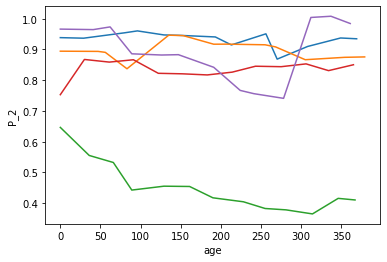

In [75]:
sns.lineplot(x='age', y='P_2', hue='customer_ID', legend=False, data=dnd)

<AxesSubplot:xlabel='age', ylabel='P_2'>

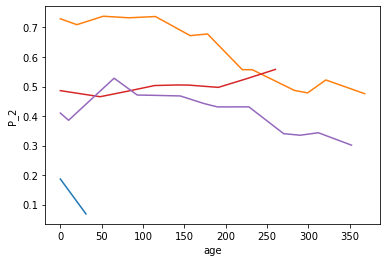

In [76]:
sns.lineplot(x='age', y='P_2', hue='customer_ID', legend=False, data=ddef)

In [78]:
dnd[dnd['customer_ID'] == dnd_ids[0]]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,min_dates,age,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03-09,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-03-09,29,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-03-09,80,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-03-09,96,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-03-09,129,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,0.001924,0.008598,0.004529,NaN,0.000674,0.002223,0.002884,2017-03-09,148,0
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,0.001336,0.004361,0.009387,NaN,0.007727,0.007661,0.002225,2017-03-09,193,0
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385,2017-03-09,213,0
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950845,0.009896,0.016888,1.003995,0.001789,0.102792,0.002519,0.009817,...,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995,2017-03-09,256,0
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868580,0.001082,0.001930,1.007504,0.001772,0.100470,0.004626,0.006073,...,0.003611,0.009607,0.007266,NaN,0.008763,0.004753,0.009068,2017-03-09,270,0


In [89]:
columns = list(dnd.drop(columns=['customer_ID', 'S_2', 'min_dates', 'target']))

columns

['P_2',
 'D_39',
 'B_1',
 'B_2',
 'R_1',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'B_4',
 'D_45',
 'B_5',
 'R_2',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'B_6',
 'B_7',
 'B_8',
 'D_50',
 'D_51',
 'B_9',
 'R_3',
 'D_52',
 'P_3',
 'B_10',
 'D_53',
 'S_5',
 'B_11',
 'S_6',
 'D_54',
 'R_4',
 'S_7',
 'B_12',
 'S_8',
 'D_55',
 'D_56',
 'B_13',
 'R_5',
 'D_58',
 'S_9',
 'B_14',
 'D_59',
 'D_60',
 'D_61',
 'B_15',
 'S_11',
 'D_62',
 'D_63',
 'D_64',
 'D_65',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'D_66',
 'B_20',
 'D_68',
 'S_12',
 'R_6',
 'S_13',
 'B_21',
 'D_69',
 'B_22',
 'D_70',
 'D_71',
 'D_72',
 'S_15',
 'B_23',
 'D_73',
 'P_4',
 'D_74',
 'D_75',
 'D_76',
 'B_24',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_8',
 'R_9',
 'S_16',
 'D_80',
 'R_10',
 'R_11',
 'B_27',
 'D_81',
 'D_82',
 'S_17',
 'R_12',
 'B_28',
 'R_13',
 'D_83',
 'R_14',
 'R_15',
 'D_84',
 'R_16',
 'B_29',
 'B_30',
 'S_18',
 'D_86',
 'D_87',
 'R_17',
 'R_18',
 'D_88',
 'B_31',
 'S_19',
 'R_19',
 'B_32',
 

In [92]:
def variabalizer(list, letter):
    return [item for item in list if item.startswith(letter)]

In [95]:
payment_variables = variabalizer(columns, 'P')
spend_variables = variabalizer(columns, 'S')
delinquency_variables = variabalizer(columns, 'D')
balance_variables = variabalizer(columns, 'B')
risk_variables = variabalizer(columns, 'R')

In [114]:
variable_list = [payment_variables, spend_variables,
                 delinquency_variables, balance_variables, risk_variables]

<Figure size 432x288 with 0 Axes>

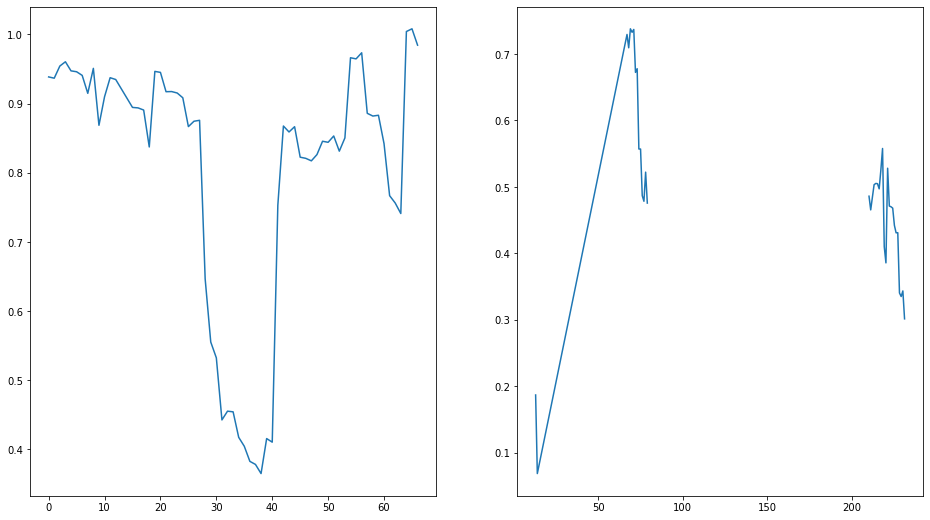

<Figure size 432x288 with 0 Axes>

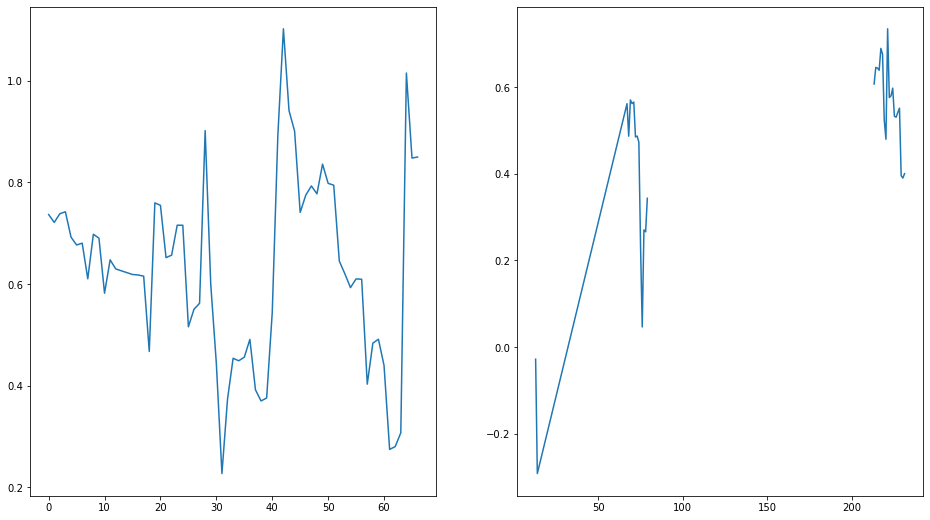

<Figure size 432x288 with 0 Axes>

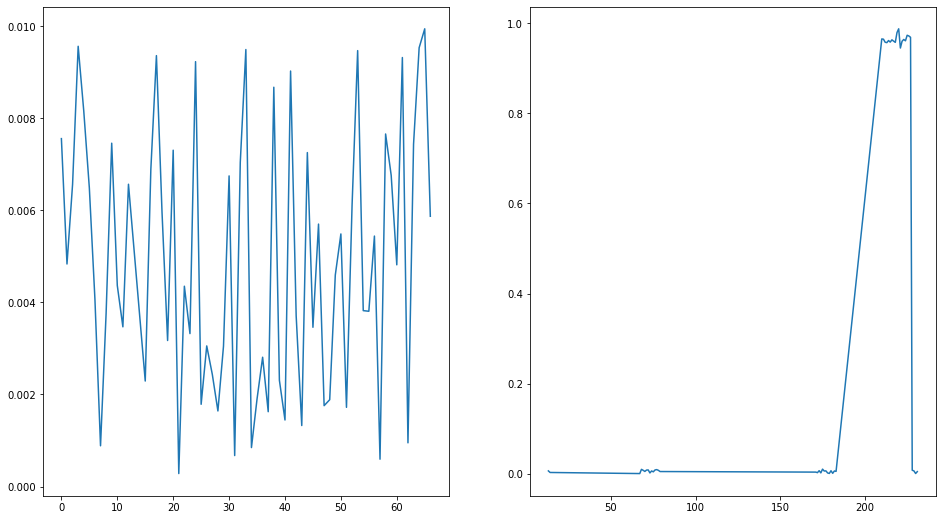

In [124]:
for var in payment_variables:
    plt.figure()
    plt.figure(figsize=(16, 9))
    
    plt.subplot(121)
    plt.plot(dnd[var])
    
    plt.subplot(122)
    plt.plot(ddef[var])